### Ferramentas de CNN:

- Vamos criar um exemplo de código em Python usando a biblioteca TensorFlow/Keras para aplicar técnicas de padding, stride, pooling layer e downsampling em uma imagem do dataset CIFAR-10. O código vai mostrar a imagem original e as imagens tratadas para cada técnica.

- Passos:
Carregar o dataset CIFAR-10.
Aplicar padding, stride, pooling layer e downsampling nas imagens.
Visualizar a imagem original e as imagens tratadas.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.models import Model

In [22]:
# Função para visualizar imagens
def plot_images(original, processed_list, titles):
    fig, axs = plt.subplots(1, len(processed_list) + 1, figsize=(20, 5))
    
    # Mostrar a imagem original
    axs[0].imshow(original)
    axs[0].set_title('Original')
    axs[0].axis('off')

    # Mostrar as imagens processadas
    for i, (processed, title) in enumerate(zip(processed_list, titles), start=1):
        axs[i].imshow(processed)
        axs[i].set_title(title)
        axs[i].axis('off')

    plt.show()

In [23]:
# Carregar o dataset CIFAR-10
(x_train, _), (_, _) = cifar10.load_data()

# Selecionar uma imagem aleatória
image = x_train[np.random.choice(x_train.shape[0])]

# Normalizar a imagem para o intervalo [0, 1]
image = image.astype('float32') / 255.0

# Adicionar uma dimensão de batch para processar com o modelo
image_batch = np.expand_dims(image, axis=0)

In [24]:
# Aplicar Padding
padding_layer = ZeroPadding2D(padding=(2, 2), input_shape=(32, 32, 3))
padded_image = padding_layer(image_batch)

# Aplicar Convolução com Stride
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=(2, 2), padding='valid')
conv_image = conv_layer(padded_image)

# Aplicar Max Pooling
pooling_layer = MaxPooling2D(pool_size=(2, 2))
pooled_image = pooling_layer(conv_image)

# Função para converter tensor para imagem
def tensor_to_image(tensor):
    # Remove a dimensão de batch usando tf.squeeze()
    tensor = tf.squeeze(tensor)  # Remove as dimensões extras
    tensor = tensor.numpy()  # Converte o tensor para um array NumPy
    tensor = np.clip(tensor, 0, 1)  # Garante que os valores estão no intervalo [0, 1]
    if tensor.shape[-1] == 1:  # Caso o tensor tenha apenas um canal
        tensor = np.repeat(tensor, 3, axis=-1)  # Convert para RGB
    return tensor



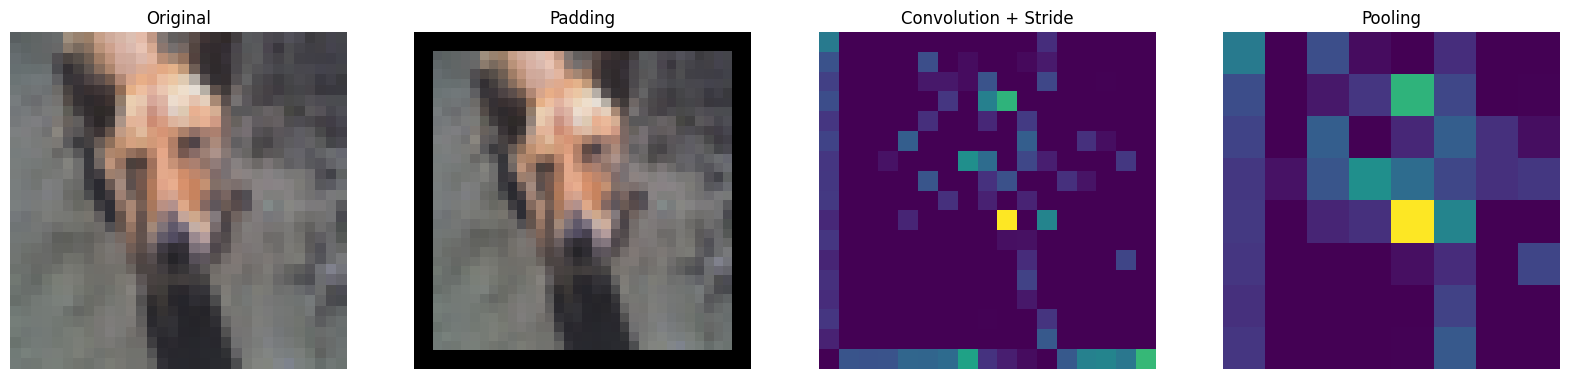

In [25]:
# Convertendo as imagens processadas
processed_images = [
    tensor_to_image(padded_image[0]),
    tensor_to_image(conv_image[0]),
    tensor_to_image(pooled_image[0])
]

# Visualizar as imagens
titles = ['Padding', 'Convolution + Stride', 'Pooling']
plot_images(image, processed_images, titles)

- Tentando afinar o convolution + stride e o pooling para melhorar a identificação da imagem inicial:

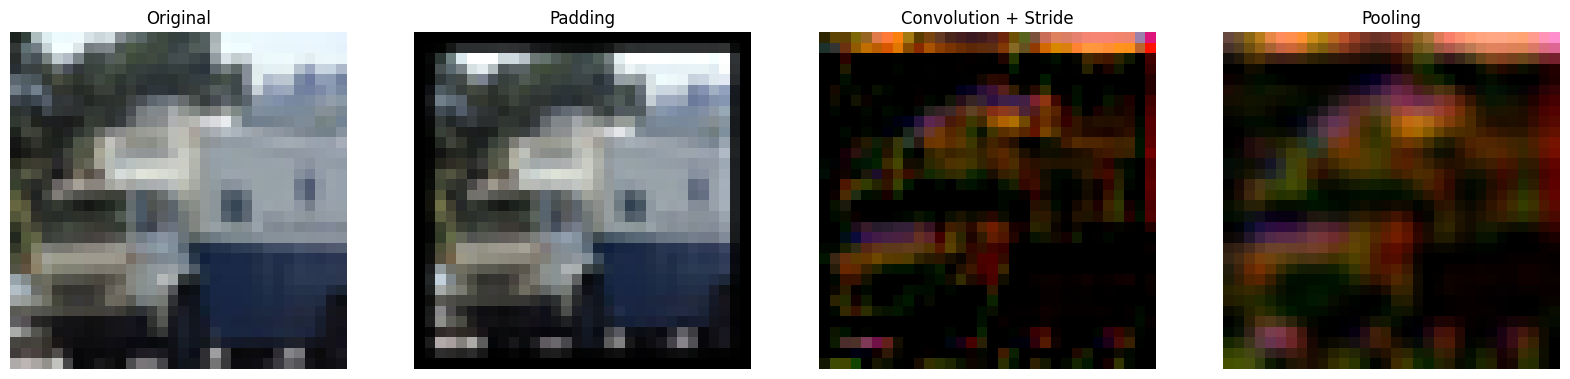

In [33]:
from PIL import Image  # Certifique-se de que a importação está correta

# Função para visualizar imagens
def plot_images(original, processed_list, titles):
    fig, axs = plt.subplots(1, len(processed_list) + 1, figsize=(20, 5))
    
    # Mostrar a imagem original
    axs[0].imshow(original)
    axs[0].set_title('Original')
    axs[0].axis('off')

    # Mostrar as imagens processadas
    for i, (processed, title) in enumerate(zip(processed_list, titles), start=1):
        axs[i].imshow(processed)
        axs[i].set_title(title)
        axs[i].axis('off')

    plt.show()

# Função para ajustar o tamanho da imagem para visualização
def resize_image(image, target_size=(32, 32)):
    image = Image.fromarray((image * 255).astype(np.uint8))
    image = image.resize(target_size, Image.Resampling.LANCZOS)  # Usando Resampling.LANCZOS para redimensionamento
    return np.array(image) / 255.0

# Carregar o dataset CIFAR-10
(x_train, _), (_, _) = cifar10.load_data()

# Selecionar uma imagem aleatória
image = x_train[np.random.choice(x_train.shape[0])]

# Normalizar a imagem para o intervalo [0, 1]
image = image.astype('float32') / 255.0

# Adicionar uma dimensão de batch para processar com o modelo
image_batch = np.expand_dims(image, axis=0)

# Aplicar Padding
padding_layer = ZeroPadding2D(padding=(2, 2), input_shape=(32, 32, 3))
padded_image = padding_layer(image_batch)

# Aplicar Convolução com Stride
conv_layer = Conv2D(filters=3, kernel_size=(5, 5), strides=(1, 1), padding='valid')
conv_image = conv_layer(padded_image)

# Aplicar Max Pooling
pooling_layer = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
pooled_image = pooling_layer(conv_image)

# Função para converter tensor para imagem
def tensor_to_image(tensor):
    tensor = tf.squeeze(tensor)  # Remove as dimensões extras
    tensor = tensor.numpy()  # Converte o tensor para um array NumPy
    tensor = np.clip(tensor, 0, 1)  # Garante que os valores estão no intervalo [0, 1]
    # Ajusta para garantir que a imagem tenha 3 canais
    if tensor.shape[-1] > 3:  # Caso o tensor tenha mais de 3 canais
        tensor = tensor[..., 0]  # Seleciona o primeiro canal
    elif tensor.shape[-1] != 3:  # Caso o tensor tenha apenas um canal
        tensor = np.repeat(tensor, 3, axis=-1)  # Converte para RGB
    return resize_image(tensor)  # Ajusta o tamanho da imagem para visualização

# Convertendo as imagens processadas
processed_images = [
    tensor_to_image(padded_image),
    tensor_to_image(conv_image),
    tensor_to_image(pooled_image)
]

# Ajuste para visualizar a imagem original
original_image_rgb = resize_image(image, target_size=(32, 32))  # Converte para RGB e ajusta o tamanho

# Visualizar as imagens
titles = ['Padding', 'Convolution + Stride', 'Pooling']
plot_images(original_image_rgb, processed_images, titles)